In [2]:
# import libraries
import numpy as np
import pandas as pd
import os 


In [3]:
os.getcwd()

'C:\\Users\\Fred'

In [18]:
# read data
train_data = pd.read_csv("C://Users/Fred/Desktop/Kaggle/Titanic - Machine Learning from Disaster/train.csv")

test_data = pd.read_csv("C://Users/Fred/Desktop/Kaggle/Titanic - Machine Learning from Disaster/test.csv")

In [26]:
# check data
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# check count of missing data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# check NaN on 'Age'
train_data[train_data['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# conclude that cabin is unreliable due to large % of missing values in both datasets
# check the two records from train dataset with null "Embarked"
train_data[train_data['Embarked'].isnull()]

In [22]:
# we note they share the same ticket number
# check if there are any other records with same ticket number
# that might have a non-null "Embarked"
# we could then assume these two records could reasonably have the same "Embarked"
train_data[train_data['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
# get median age by Sex, Survived, Embarked and Pclass
# will use these where Age is NaN
train_data.groupby(['Survived', 'Pclass', 'Sex']).median()

PassengerId   Age  SibSp  Parch       Fare
Survived Pclass Sex                                               
0        1      female        298.0  25.0    1.0    2.0  151.55000
                male          439.0  45.5    0.0    0.0   42.40000
         2      female        335.5  32.5    0.5    0.0   17.00000
                male          419.0  30.5    0.0    0.0   13.00000
         3      female        430.5  22.0    1.0    1.0   14.47915
                male          471.5  25.0    0.0    0.0    7.89580
1        1      female        458.0  35.0    0.0    0.0   82.17080
                male          588.0  36.0    0.0    0.0   35.50000
         2      female        442.5  28.0    0.0    0.0   23.00000
                male          408.0   3.0    0.0    1.0   18.75000
         3      female        322.5  19.0    0.0    0.0    9.46875
                male          430.0  25.0    0.0    0.0    8.05000

In [40]:
# for both test and train datasets0
# replace NaN Ages with the median Age found 
# by grouping by Pclass, Sex (and Survived for train data)
# we use median as a better measure of central tendency than mean
# as it will be less affected by outliers

train_data['Age'] = train_data['Age'].fillna(train_data.groupby(['Pclass','Sex','Survived'])['Age'].transform('median'))
test_data['Age'] = test_data['Age'].fillna(test_data.groupby(['Pclass','Sex'])['Age'].transform('median'))

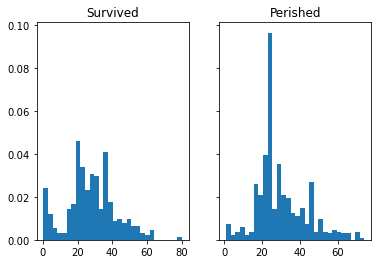

In [53]:
# plot histogram of ages, one for survived and one for perished
# use density = True to enable comparison of proportions

import matplotlib.pyplot as plt

num_bins = 30

fig, ax = plt.subplots(1,2, sharey = True)

# the histogram of the data
ax[0].hist(train_data[train_data['Survived']==1]['Age'], num_bins, density=True)
ax[1].hist(train_data[train_data['Survived']==0]['Age'], num_bins, density=True)

ax[0].set_title('Survived')
ax[1].set_title('Perished')


plt.show()

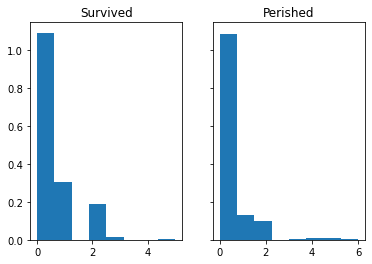

In [54]:
# plot histogram of Parch, one for survived and one for perished
# use density = True to enable comparison of proportions

num_bins = 8

fig, ax = plt.subplots(1,2, sharey = True)

# the histogram of the data
ax[0].hist(train_data[train_data['Survived']==1]['Parch'], num_bins, density=True)
ax[1].hist(train_data[train_data['Survived']==0]['Parch'], num_bins, density=True)

ax[0].set_title('Survived')
ax[1].set_title('Perished')


plt.show()

In [55]:
# we note from comparing histograms that the major difference
# in terms of a "child surviving"
# occurs around the 10 years old mark
# create IsChild column based on age <= 10

# we also observe SibSp = 0 has a much higher survival rate

train_data['IsChild'] = np.where(train_data['Age'] <= 10, 'Yes', 'No')
test_data['IsChild'] = np.where(test_data['Age'] <= 10, 'Yes', 'No')

In [56]:
# now that we've populated those null Ages
# let's go back and drop the two rows with null "Embarked"
train_data = train_data[train_data['Ticket'] != '113572']

In [57]:
# check what data looks like now
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,No
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,No


In [58]:
# machine learning algo goes brrrrr
# IsChild doesn't seem as predictive as just using Age (once cleansed)

from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
